In [ ]:
#Excercise 1
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def rangeSumBST(root, low, high):
    if not root:
        return 0

    if root.val < low:
        # If the current node value is less than 'low', search the right subtree.
        return rangeSumBST(root.right, low, high)
    elif root.val > high:
        # If the current node value is greater than 'high', search the left subtree.
        return rangeSumBST(root.left, low, high)
    else:
        # If the current node value is within the range [low, high], add it to the sum and continue searching both subtrees.
        return root.val + rangeSumBST(root.left, low, high) + rangeSumBST(root.right, low, high)
    
# Example usage:
root = TreeNode(10)
root.left = TreeNode(5)
root.right = TreeNode(15)
root.left.left = TreeNode(3)
root.left.right = TreeNode(7)
root.right.right = TreeNode(18)

low = 7
high = 15

result = rangeSumBST(root, low, high)
print(result)  # This will output 32 (5 + 7 + 10 + 15)

Excercise 2:
First we import all the needed packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from torch.nn import functional as F
import torch
import warnings #to remove the warnings
warnings.filterwarnings('ignore')
#For KNN 
from sklearn.neighbors import KNeighborsClassifier
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
#Sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

1) Load data using pandas and show information about the data such as number of entries, number of columns, list of columns


In [7]:
Customer_churn = pd.read_csv("C:\\Users\\Martin\\Downloads\\Customer-Churn.csv")
print(Customer_churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


2) Data exploration
Plot the perceptange of samples corresponding to values in Churn column
Plot the relation between the target class and other categorical features

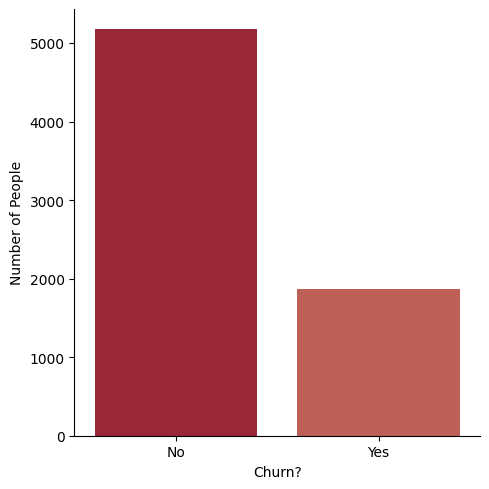

In [9]:
#Plot the perceptange of samples corresponding to values in Churn column
cat_plot = sns.catplot(x = "Churn", data = Customer_churn, kind = 'count', palette=sns.color_palette("RdBu", 10) )
cat_plot.set(xlabel = 'Churn?', ylabel = 'Number of People', xticklabels=['No', 'Yes'])
#plt.show()

The model developed tries to classify whether a person would “Churn” (stop) on payinf gor service or not. The response variable is binary (has only two possible values – in this case, “Yes” or “No”). The predictor variables are 16 categorical variables (some other variables will get dropped later) . A logistic regression model is necessary since the response variable is binary.However, before proceeding to this model, the class balance of the outcome variable was checked to see how many “Yes” and “No” values existed. The results showed 5000+ “No” values and around 2000 “Yes” values, indicating that the dataset (or specifically, the training dataset) needs to be resampled.  

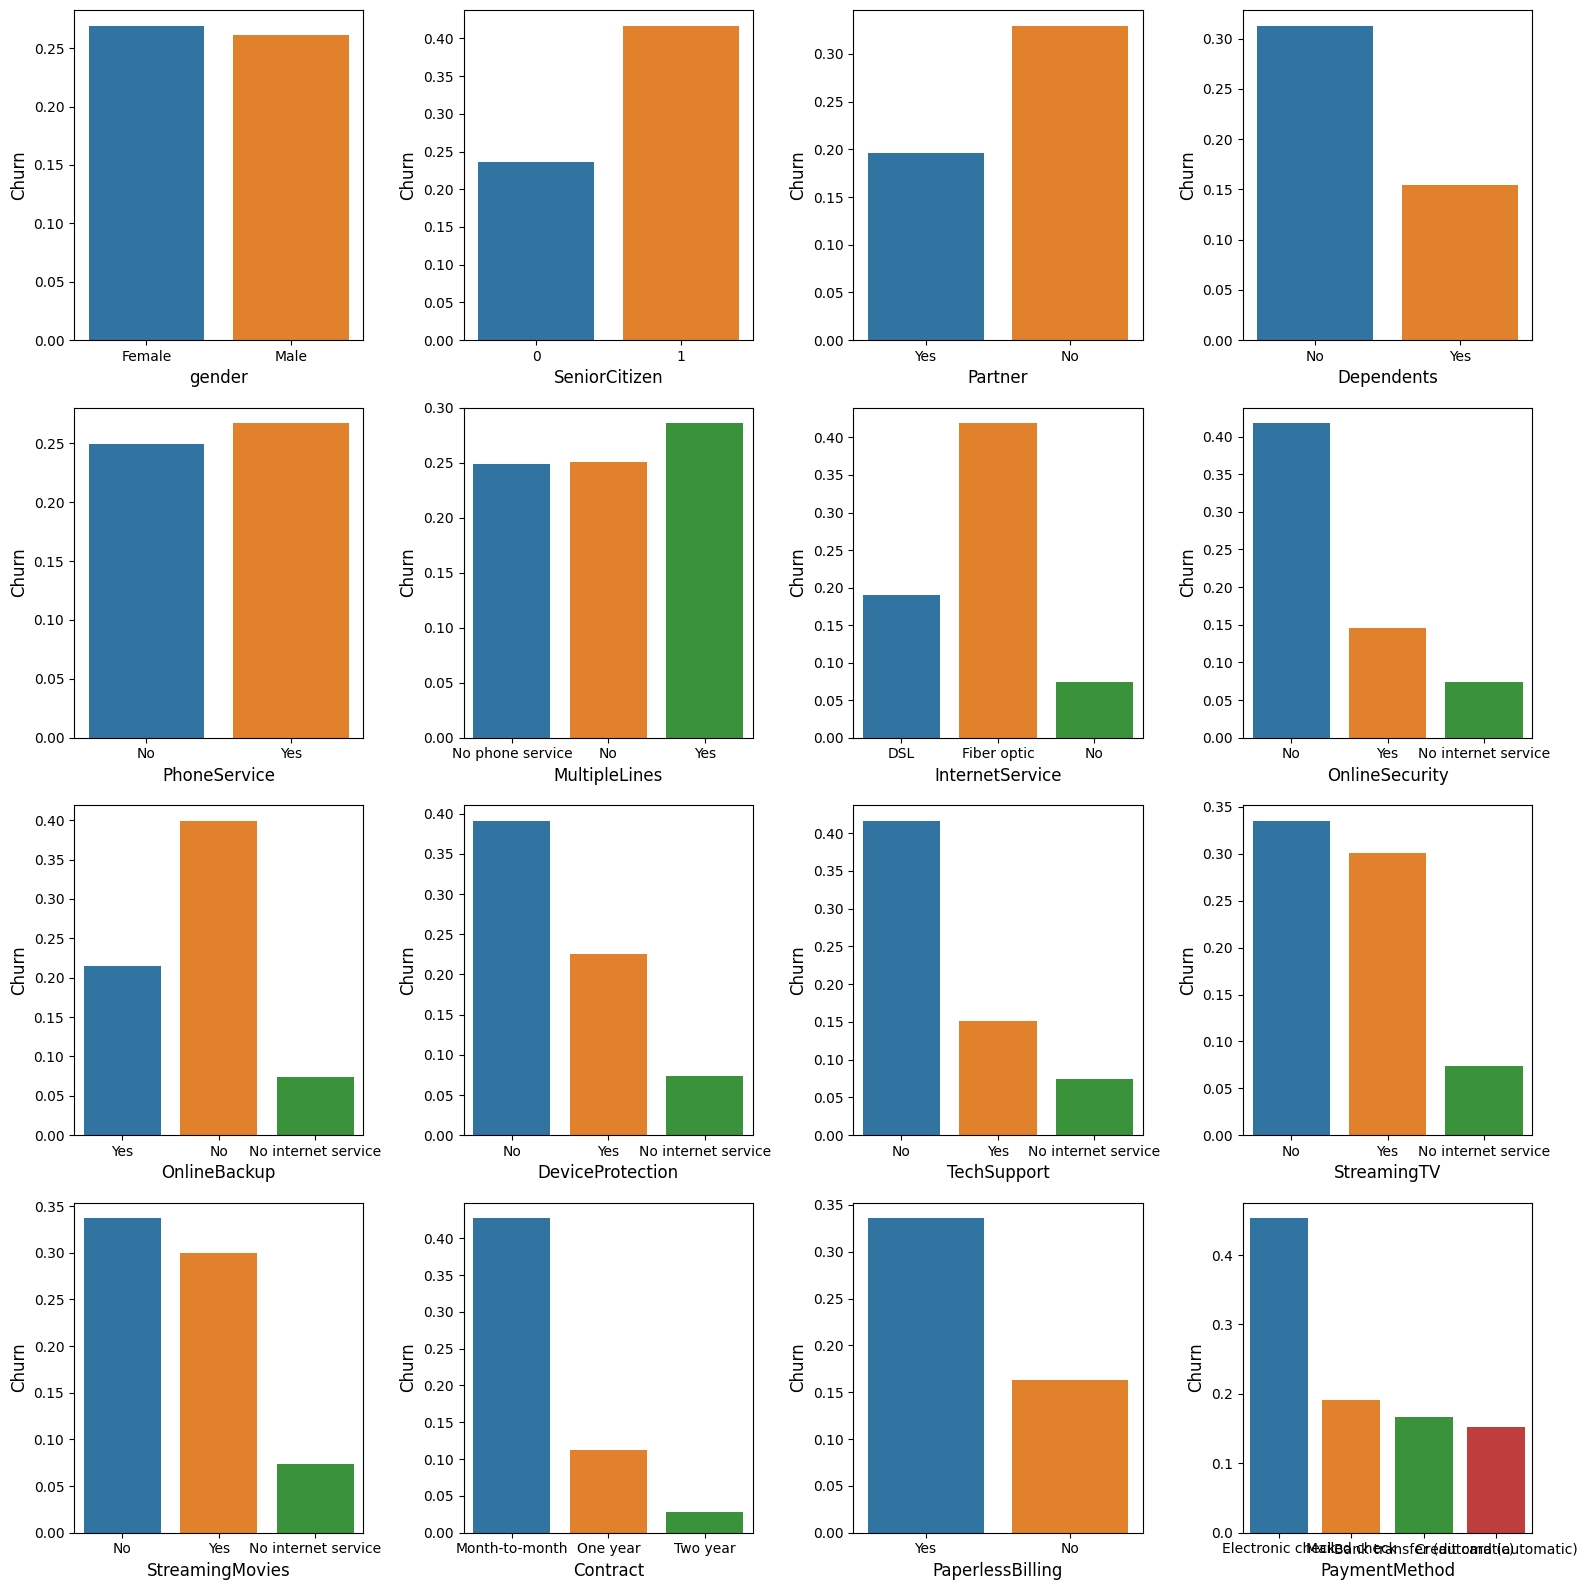

In [10]:
# Define the target variable and features
target = "Churn"
features = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService",
            "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
            "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
            "Contract", "PaperlessBilling", "PaymentMethod"]

# Select the subset of data with the specified columns
selected_data = Customer_churn[features + [target]]

# Convert the "Churn" column to binary values (0 for 'No', 1 for 'Yes')
selected_data['Churn'] = selected_data['Churn'].map({'No': 0, 'Yes': 1})

# Create a single figure with multiple subplots for each binary-encoded feature
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for idx, feature in enumerate(features):
    row, col = divmod(idx, 4)
    ax =sns.barplot(x=feature, y=target, data=selected_data, ci=None, ax=axes[row, col])
    #axes[row, col].set_title(f'Relationship between {feature} and Churn')
    ax.set_xlabel(feature, fontsize=12)  # Increase x-axis label font size
    ax.set_ylabel(target, fontsize=12)  # Increase y-axis label font size
# Adjust the layout and spacing
plt.tight_layout()
plt.show()

These relation bar plots helps to answer few quick questions about the dataset such as Differences in Means, Distribution, and Spread, Insights, and Patterns of these categorical data compared to the Predictor variable "Churn".

3) Data preprocessing
Remove the unnecessary column customerID
Drop NAN values in the data

In [11]:
Customer_churn = Customer_churn.drop("customerID", axis=1)
#Drop NAN values in the data
#Drop Row with NAN
Customer_churn = Customer_churn.dropna()
# Reset the index after dropping rows
Customer_churn = Customer_churn.reset_index(drop=True)

4) Prepare train and test data
Split data into training and test data based on Churn class. Use 30% of data for testing.

In [12]:
# Convert categorical variables to numeric using one-hot encoding
Customer_churn = pd.get_dummies(Customer_churn, columns=features, drop_first=True)
#Label the chosen  independent and dependent variables 
y = Customer_churn['Churn'] #Decision variable
x = Customer_churn.drop(['Churn'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3)

5) Training the classification model and evaluate on the test data
Use the following algorithms:
Logistic Regression
KNN
Random Forest

Logistic Regression

The intercept b0=  [-0.13042374]
The coefficient b1=  [[-6.21833925e-02  6.45176071e-03  3.10953443e-04 -2.13565168e-02
   3.18627198e-01  4.12542101e-02 -1.29411917e-01 -4.16780116e-01
   2.88586502e-01  1.63289501e-01  4.89983482e-01 -1.46222197e-01
  -1.46222197e-01 -5.29265770e-01 -1.46222197e-01 -2.69839550e-01
  -1.46222197e-01 -1.31836629e-01 -1.46222197e-01 -5.85780900e-01
  -1.46222197e-01  1.35038725e-01 -1.46222197e-01  1.56412453e-01
  -4.86146893e-01 -5.97125639e-01  3.55921854e-01 -1.18397373e-01
   1.84811271e-01 -7.36741831e-02]]

Accuracy from confusion matrix is 81.52%


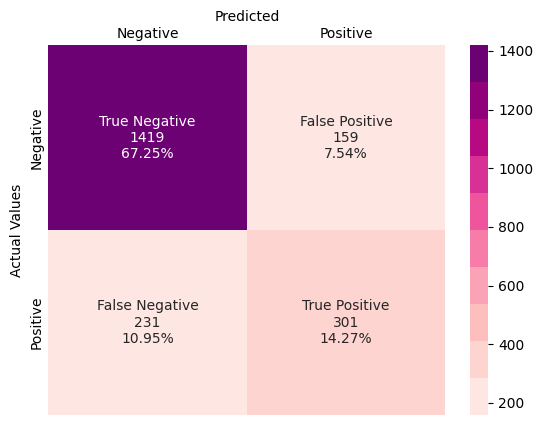

In [16]:
# Logistic Regression
#use sklearn to implement logistic regression
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)

        
#print the regression coefficients
print("The intercept b0= ", modelLogistic.intercept_)

print("The coefficient b1= ", modelLogistic.coef_)


#Make prediction 
y_pred= modelLogistic.predict(x_test)

#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)

#obtain True Positive, True Negative, False Positive and False Negative 
#print(classification_report(y_test, y_pred))

#Accuracy from confusion matrix
TP= ConfusionMatrix[1,1] #True positive
TN= ConfusionMatrix[0,0] #True negative
Total=len(y_test)
accuracy = (TN + TP) / Total
accuracy_percentage = accuracy * 100
print("\nAccuracy from confusion matrix is {:.2f}%".format(accuracy_percentage))

#print(modelLogistic.score(x,y)) - alternative

#Confusion matrix plot with label settings
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in ConfusionMatrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in ConfusionMatrix.flatten()/np.sum(ConfusionMatrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
heat_map = sns.heatmap(ConfusionMatrix, annot=labels, fmt='', cmap= sns.color_palette("RdPu", 10))
heat_map.set_xlabel('Predicted')
heat_map.set_ylabel('Actual Values')
heat_map.tick_params(length=0, labeltop=True, labelbottom=False)
heat_map.xaxis.set_label_position('top')
heat_map.set_xticklabels(['Negative', 'Positive'])
heat_map.set_yticklabels(['Negative', 'Positive'], rotation=90, va='center')
plt.show()

The results indicate that as the variables are both statistically significant in determining whether the individual will Churn or not (p < 0.05 and p < 0.001, respectively). Using the testing data, the results indicated the following percentages of:
1.	True Positives – accurately predicted “Yes” values
2.	True Negatives – accurately predicted “No” values
3.	False Positives – mislabeled “Yes” values when they are actually “No”
4.	False Negatives – mislabeled “No” values when they are actually “Yes”.

In total, the results of the logistic model indicate the following:
•	True Negative – 67.25%
•	True Positive – 14.27%
•	False Negative – 10.95%
•	False Positive – 7.54%
The model’s total accuracy is 81.52% . This means, that 81.52% of the times, the model accurately predicted whether the individual would Churn or not. 

KNN Model is a lazy learning, non-parametric algorithm. It uses data with several classes to predict the classification of the new sample point. KNN is non-parametric since it doesn’t make any assumptions on the data being studied, i.e., the model is distributed from the data. 

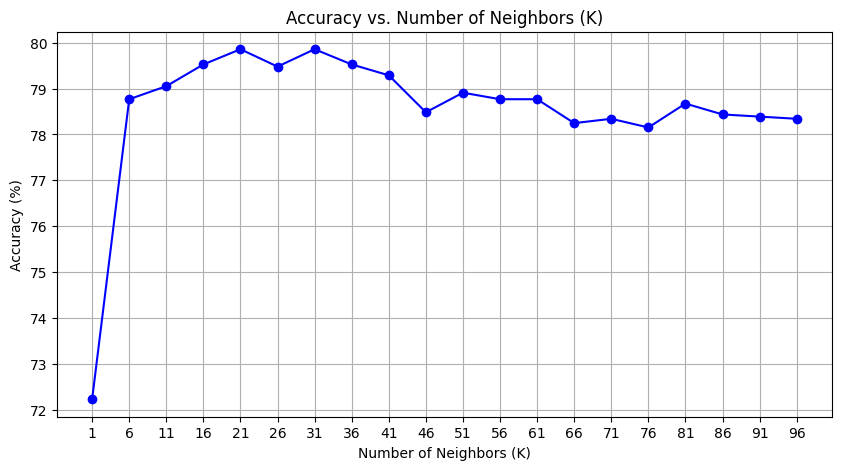

The KNN model reached the highest accuracy of 79.85781990521326 at k = 21


In [17]:
# Initialize a list to store k-NN models
knn_models = {}
k_values = list(range(1, 100,5))  # Try k values from 1 to 10

# Create and fit k-NN models for different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    accuracy = accuracy_score(y_test, knn.predict(x_test)) * 100
    knn_models[k] = accuracy

# Calculate accuracy for each model
best_k = max(knn_models, key=knn_models.get)
best_accuracy = knn_models[best_k]

# Plot the accuracy vs. K
plt.figure(figsize=(10, 5))
plt.plot(list(knn_models.keys()), list(knn_models.values()), marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy (%)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

print("The KNN model reached the highest accuracy of", best_accuracy, "at k =", best_k)

The KNN model relied solely on the number of 'neighbors' (k), which is the range of values used for prediction. A rule of thumbs fore the K value is to set K eaqual to square roots of total entry, which is 84 in this case.
Howecer, trial and error is needed in this K to determine the best K value. That's why I chose K in the range from 1 to 100 with increment of 5 to see which K value can reach the highest accuracy.
In this model,  K = 21 is the best accuracy at 79.85%.

Random forest is a commonly-used machine learning algorithm trademarked by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result

In [18]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

y_train_pred = random_forest.predict(x_train)
y_test_pred = random_forest.predict(x_test)

#accuracy scores for the training and test
rf_train = accuracy_score(y_train, y_train_pred)
rf_test = accuracy_score(y_test, y_test_pred)

print(f"Random forest train/test accuracies: {rf_train: .3f}/{rf_test:.3f}")

Random forest train/test accuracies:  0.998/0.798


"Train accuracy" or "training accuracy" is the accuracy of the model when it's evaluated on the same dataset it was trained on. In this case, it's 99.8%.

"Test accuracy" is the accuracy of the model when it's evaluated on a separate dataset that it hasn't seen during training. In this case, it's 79.8%.

In this Random Forest model, the high accuracy of training means that this model is overfitting. This happen when the model leanrs training data too well, including its outliers, and may not generalize well to new, unseen data.

In the case of class imbalance such as this dataset, remodeling using resampled dataset and hyper-tuning parameter is needed  to get a more comprehensive understanding of the model's performance.

6) Using sampling method to tackle the problem of data imbalance
Use sampling method (undersampling or over-sampling) on the training data, train the model and re-evaluate on the test data

In [19]:
# Apply SMOTE for oversampling
over_sampling = SMOTE(sampling_strategy='auto')
x_train_resampled, y_train_resampled = over_sampling.fit_resample(x_train, y_train)

# Apply NearMiss for undersampling
under_sampling = NearMiss(sampling_strategy='auto', version=1)
x_train_resampled, y_train_resampled = under_sampling.fit_resample(x_train_resampled, y_train_resampled)

Rerun Logistic Regression using resampled data

In [20]:
# Logistic Regression
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train_resampled, y_train_resampled)

# Make predictions
y_pred = modelLogistic.predict(x_test)

# Creating a confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)

# Accuracy from the confusion matrix
TP = ConfusionMatrix[1, 1]  # True positive
TN = ConfusionMatrix[0, 0]  # True negative
Total = len(y_test)
print("Accuracy from confusion matrix is ", (TN + TP) / Total)

Accuracy from confusion matrix is  0.7725118483412322


In this run using resampled dataset the accuracy is 77,25%, which is lower than the original model accuracy of 81.52%. That mean using the resampled dataset might not be as effective.

In [ ]:
Rerun KNN using resampled data

The KNN resampled model reached the highest accuracy of 74.02843601895735 at k = 26


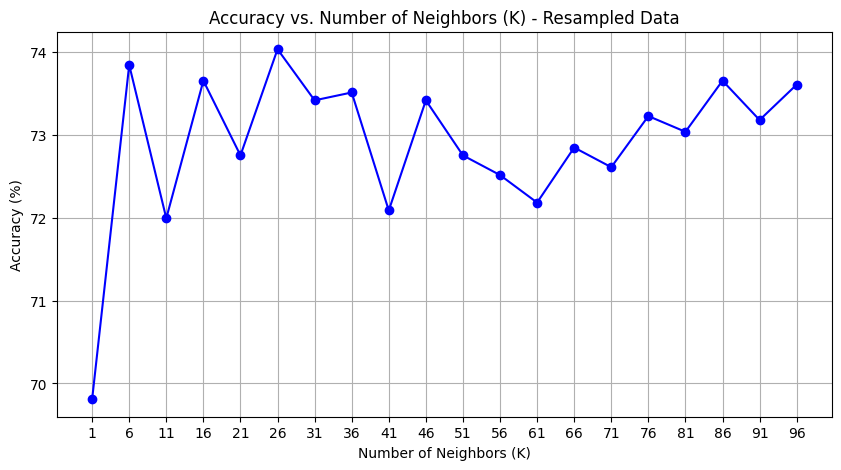

In [21]:
# Create and fit k-NN models for different k values
knn_models_resampled = {}

for k in k_values:
    knn_resampled = KNeighborsClassifier(n_neighbors=k)
    knn_resampled.fit(x_train_resampled, y_train_resampled)
    accuracy_resampled = accuracy_score(y_test, knn_resampled.predict(x_test)) * 100
    knn_models_resampled[k] = accuracy_resampled

# Calculate accuracy for each model
best_k_resampled = max(knn_models_resampled, key=knn_models_resampled.get)
best_accuracy_resampled = knn_models_resampled[best_k_resampled]

# Plot the accuracy vs. K for resampled data
plt.figure(figsize=(10, 5))
plt.plot(list(knn_models_resampled.keys()), list(knn_models_resampled.values()), marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (K) - Resampled Data')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy (%)')
plt.xticks(k_values)
plt.grid(True)

print("The KNN resampled model reached the highest accuracy of", best_accuracy_resampled, "at k =", best_k_resampled)


In this run using resampled dataset the accuracy is 77,02%, which is lower than the original model accuracy of 85.78%. That mean using the resampled dataset might not be as effective.

Rerun Random Forest model using resampled data

In [22]:
# Apply SMOTE for oversampling
over_sampling = SMOTE(sampling_strategy='auto')
x_train_resampled, y_train_resampled = over_sampling.fit_resample(x_train, y_train)

# Apply NearMiss for undersampling
under_sampling = NearMiss(sampling_strategy='auto', version=1)
x_train_resampled, y_train_resampled = under_sampling.fit_resample(x_train_resampled, y_train_resampled)

# Random Forest with resampled data
random_forest_resampled = RandomForestClassifier()
random_forest_resampled.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test data using resampled Random Forest
y_train_pred_resampled = random_forest_resampled.predict(x_train_resampled)
y_test_pred_resampled = random_forest_resampled.predict(x_test)

# Accuracy scores for the training and test data using resampled Random Forest
rf_train_resampled = accuracy_score(y_train_resampled, y_train_pred_resampled)
rf_test_resampled = accuracy_score(y_test, y_test_pred_resampled)

print(f"Random Forest train/test accuracies after resampling: {rf_train_resampled:.3f}/{rf_test_resampled:.3f}")

Random Forest train/test accuracies after resampling: 0.999/0.768


"Train accuracy" or "training accuracy" is the accuracy of the model when it's evaluated on the same dataset it was trained on. In this case, it's 99.9%.

"Test accuracy" is the accuracy of the model when it's evaluated on a separate dataset that it hasn't seen during training. In this case, it's 76.8%.

In this run using resampled dataset the accuracy is 76,8%, which is lower than the original model accuracy of 79.8%. That mean using the resampled dataset might not be as effective.

7) Hyper-parameter tuning
Use the training data to tune hyper-parameters of Random Forest. You can use grid-search to tune hyper-parameters of Random Forest.

The goal is to find the best hyperparameters that will lead to the highest model performance on the validation or test data. This is a common and important step in the machine learning model development process to optimize your model's performance.

In [24]:
parameters = {
    'max_depth': [5, 10, 20],                         # (1) Max depth values to be considered
    'n_estimators': [i for i in range(10, 100, 10)],  # (2) Number of trees in the forest
    'min_samples_leaf': [i for i in range(1, 10)],    # (3) Minimum samples in a leaf node
    'criterion': ['gini', 'entropy'],                # (4) Split criterion for decision trees
    'max_features': [ 'sqrt', 'log2']          # (5) Maximum number of features to consider for splits
}

clf = GridSearchCV(random_forest, parameters, n_jobs= 4) #I chosed 4 cores, otherwise it's going to break my PC

clf.fit(x_train, y_train)

print(clf.best_params_)
#Output: 
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 3, 'n_estimators': 10}


y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)
rf_train = accuracy_score(y_train, y_train_pred)
rf_test = accuracy_score(y_test, y_test_pred)
print(f"Random forest train/test accuracies: {rf_train: .3f}/{rf_test:.3f}")

# Create a Random Forest Classifier
random_forest_resampled = RandomForestClassifier()

# Initialize Grid Search with the Random Forest model and parameters
clf = GridSearchCV(random_forest_resampled, parameters, n_jobs=4)

# Fit the Grid Search to the resampled training data
clf.fit(x_train_resampled, y_train_resampled)

# Print the best hyperparameters
print(clf.best_params_)

# Make predictions on the training and test data using the best parameters
y_train_pred = clf.predict(x_train_resampled)
y_test_pred = clf.predict(x_test)

# Calculate accuracy scores
rf_train = accuracy_score(y_train_resampled, y_train_pred)
rf_test = accuracy_score(y_test, y_test_pred)

# Print the results
print(f"Random forest train/test accuracies after resampling: {rf_train:.3f}/{rf_test:.3f}")

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 20}
Random forest train/test accuracies:  0.854/0.813
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 30}
Random forest train/test accuracies after resampling: 0.815/0.739


The provided result represents the outcome of a grid search for hyperparameter tuning in a Random Forest model. Let's interpret it:

'criterion': 'gini': The parameter criterion is set to 'gini'. In Random Forest, 'gini' is one of the criteria used to measure the quality of a split when building decision trees within the forest. It's a common choice for classification tasks.

'max_depth': 10: The maximum depth of the decision trees in the Random Forest is set to 10. This means that no tree in the forest will be deeper than 10 levels.

'max_features': 'sqrt': The maximum number of features to consider for a split is set to the square root of the total number of features. This is a common setting and helps reduce the risk of overfitting.

'min_samples_leaf': 2: The minimum number of samples required to be in a leaf node of a tree is set to 2. A leaf node is a terminal node in a decision tree.

'n_estimators': 20: The number of trees in the Random Forest is set to 20. The Random Forest model consists of an ensemble of decision trees, and in this case, there are 20 trees.



In conclusion, here is the summary of all the methods and it's accuracy

| Model          | Original   | Resampled   | Hyper-Tuning |
|----------------|----------  |-----------  |--------------|
| Logistic       | 81.52%     | 77.25%      |   N/A        |
| KNN            | 79.85%     | 74.02%      |   N/A        |
| Random Forest  | 79.8%|     | 76.8%       |73.9%         | 

For this dataset, the model with the highest accuracy is the Unsampled Logistic Regression model. It's also the fastest model and requires less computational power compared to KNN and Random Forest. Depend on dataset and our goals, other model will be evaluated different. However, in this particular dataset, Logistic Regression with Unsampled data is the most effective!